In [7]:
%pylab inline
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [8]:
Nbody = loadtxt('../CM/rgal_snaps_l0.txt')
A1_host = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a1_host.txt')
A1_sat = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a1_sat.txt')
A05_host = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a05_host.txt')
A05_sat = loadtxt('../../../orbits/data/LMC_1E11_1E12_free_a05_sat.txt')

In [9]:
Nbody_t = Nbody[:,0]
Nbody_R = Nbody[:,1]

# Making Nbody and Analytic times equal

t1 = A1_host[:,0] + 1.2 
t05 = A05_host[:,0] + 1.2

# Defining galactocentric distances and velocities
x1 = A1_host[:,1] - A1_sat[:,1]
y1 = A1_host[:,2] - A1_sat[:,2]
z1 = A1_host[:,3] - A1_sat[:,3]

vx1 = A1_host[:,4] - A1_sat[:,4]
vy1 = A1_host[:,5] - A1_sat[:,5]
vz1 = A1_host[:,6] - A1_sat[:,6]

x05 =  A05_host[:,1] - A05_sat[:,1]
y05 =  A05_host[:,2] - A05_sat[:,2]
z05 =  A05_host[:,3] - A05_sat[:,3]

vx05 =  A05_host[:,4] - A05_sat[:,4]
vy05 =  A05_host[:,5] - A05_sat[:,5]
vz05 =  A05_host[:,6] - A05_sat[:,6]

In [53]:
Rgal1 = np.sqrt(x1**2 + y1**2 + z1**2)
Rgal05 = np.sqrt(x05**2 + y05**2 + z05**2)
Vgal1 = np.sqrt(vx1**2 + vy1**2 + vz1**2)
Vgal05 = np.sqrt(vx05**2 + vy05**2 + vz05**2)

In [54]:
NB_t = Nbody[:,0]
NB_R = Nbody[:,1]
Xlmc = Nbody[:,2]
Ylmc = Nbody[:,3]
Zlmc = Nbody[:,4]
Xmw = Nbody[:,5]
Ymw = Nbody[:,6]
Zmw = Nbody[:,7]
NB_V = Nbody[:,8]
vXlmc = Nbody[:,9]
vYlmc = Nbody[:,10]
vZlmc = Nbody[:,11]
vXmw = Nbody[:,12]
vYmw = Nbody[:,13]
vZmw = Nbody[:,14]

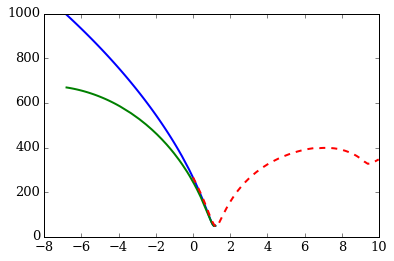

In [21]:
plot(t05, Rgal1, lw=2)
plot(t05, Rgal05, lw=2)
plot(NB_t, NB_R, lw=2, ls='--')

#xlim(0, 2)
#ylim(0, 400)

In [64]:
R2vir1 = where(Rgal1 >= 280)[0]
R2vir05 = where(Rgal05 >= 280)[0]
IC1 = R2vir1[0]
IC05 = R2vir05[0]
#print Nbody_t[index[0]]
print IC1, IC05

1283 1435


In [69]:
# Run with this ICs
print 'With full df:'
print x1[IC1], y1[IC1], z1[IC1]
print vx1[IC1], vy1[IC1], vz1[IC1]
print 
print 'With soften df:'
print x05[IC05], y05[IC05], z05[IC05]
print vx05[IC05], vy05[IC05], vz05[IC05]

With full df:
-43.490378 -261.472044 90.572333
20.21568 177.004835 5.972404

With soften df:
-41.975472 -266.550019 75.05848
14.204868 144.829729 21.979781


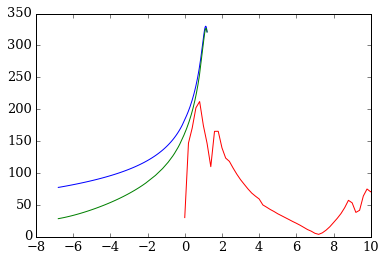

In [59]:
plot(t1, Vgal1)
plot(t05, Vgal05)
plot(NB_t, NB_V)
